In [26]:
import csv
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn

%matplotlib widget
directory = os.getcwd()

In [27]:
with open(directory+'\\'+'healthcare-dataset-stroke-data.csv', 'r') as csvfile:
    dataset = list(csv.reader(csvfile))

datasetLength = len(dataset)
dataLabels = dataset[0]
dataLabels[1] = 'sex'

dataFrame = pd.DataFrame(data=dataset[1:datasetLength-1], columns=dataLabels)

dataFrame = dataFrame.drop(columns=['id'])

dataLabels = dataLabels[1:len(dataLabels)]

print(dataFrame)

         sex age hypertension heart_disease ever_married      work_type  \
0       Male  67            0             1          Yes        Private   
1     Female  61            0             0          Yes  Self-employed   
2       Male  80            0             1          Yes        Private   
3     Female  49            0             0          Yes        Private   
4     Female  79            1             0          Yes  Self-employed   
...      ...  ..          ...           ...          ...            ...   
5104  Female  13            0             0           No       children   
5105  Female  80            1             0          Yes        Private   
5106  Female  81            0             0          Yes  Self-employed   
5107  Female  35            0             0          Yes  Self-employed   
5108    Male  51            0             0          Yes        Private   

     Residence_type avg_glucose_level   bmi   smoking_status stroke  
0             Urban          

In [28]:
for i in range(0,len(dataLabels)):
    uniqueVals = dataFrame[dataLabels[i]].unique()
    print(uniqueVals)

['Male' 'Female' 'Other']
['67' '61' '80' '49' '79' '81' '74' '69' '59' '78' '54' '50' '64' '75'
 '60' '57' '71' '52' '82' '65' '58' '42' '48' '72' '63' '76' '39' '77'
 '73' '56' '45' '70' '66' '51' '43' '68' '47' '53' '38' '55' '1.32' '46'
 '32' '14' '3' '8' '37' '40' '35' '20' '44' '25' '27' '23' '17' '13' '4'
 '16' '22' '30' '29' '11' '21' '18' '33' '24' '34' '36' '0.64' '41' '0.88'
 '5' '26' '31' '7' '12' '62' '2' '9' '15' '28' '10' '1.8' '0.32' '1.08'
 '19' '6' '1.16' '1' '1.4' '1.72' '0.24' '1.64' '1.56' '0.72' '1.88'
 '1.24' '0.8' '0.4' '0.08' '1.48' '0.56' '0.48' '0.16']
['0' '1']
['1' '0']
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['228.69' '202.21' '105.92' ... '125.2' '82.99' '166.29']
['36.6' 'N/A' '32.5' '34.4' '24' '29' '27.4' '22.8' '24.2' '29.7' '36.8'
 '27.3' '28.2' '30.9' '37.5' '25.8' '37.8' '22.4' '48.9' '26.6' '27.2'
 '23.5' '28.3' '44.2' '25.4' '22.2' '30.5' '26.5' '33.7' '23.1' '32'
 '29.9' '23.9' '28.5' '26.4

In [29]:
dataFrameClean = pd.DataFrame(columns=dataLabels)
numdropped = 0

for nIndex, row in dataFrame.iterrows():
    if(((row['avg_glucose_level']) == 'N/A') or ((row['bmi']) == 'N/A')):
        numdropped += 1
    else:
        if(str(row['sex']) == 'Male'):
            row['sex'] = 0
        elif(str(row['sex']) == 'Female'):
            row['sex'] = 1
        else:
            row['sex'] = 2

        row['age'] = float(row['age'])

        row['hypertension'] = int(row['hypertension'])
        
        row['heart_disease'] = int(row['heart_disease'])
        
        if(str(row['ever_married']) == "No"):
            row['ever_married'] = 0
        else:
            row['ever_married'] = 1

        if(str(row['work_type']) == "Private"):
            row['work_type'] = 0
        elif(str(row['work_type']) == "Self-employed"):
            row['work_type'] = 1
        elif(str(row['work_type']) == "Govt_job"):
            row['work_type'] = 2
        elif(str(row['work_type']) == "children"):
            row['work_type'] = 3
        else:
            row['work_type'] = 4

        if(str(row['Residence_type']) == "Urban"):
            row['Residence_type'] = 0
        else:
            row['Residence_type'] = 1

        row['avg_glucose_level'] = float(row['avg_glucose_level'])   
        
        row['bmi'] = float(row['bmi'])

        if(str(row['smoking_status']) == "formerly smoked"):
            row['smoking_status'] = 0
        elif(str(row['smoking_status']) == "never smoked"):
            row['smoking_status'] = 1
        elif(str(row['smoking_status']) == "smokes"):
            row['smoking_status'] = 2
        else:
            row['smoking_status'] = 3

        row['stroke'] = int(row['stroke'])

        dataFrameClean.loc[len(dataFrameClean.index)] = row

print("Dropped: "+str(numdropped)+", now at: ", str(len(dataFrameClean)))

Dropped: 201, now at:  4908


In [30]:
for i in range(0,len(dataLabels)):
    uniqueVals = dataFrameClean[dataLabels[i]].unique()
    print(uniqueVals)

[0 1 2]
[67.0 80.0 49.0 79.0 81.0 74.0 69.0 78.0 61.0 54.0 50.0 64.0 75.0 60.0
 71.0 52.0 82.0 65.0 57.0 42.0 48.0 72.0 58.0 76.0 39.0 77.0 63.0 73.0
 56.0 45.0 70.0 59.0 66.0 43.0 68.0 47.0 53.0 38.0 55.0 46.0 32.0 51.0
 14.0 3.0 8.0 37.0 40.0 35.0 20.0 44.0 25.0 27.0 23.0 17.0 13.0 4.0 16.0
 22.0 30.0 29.0 11.0 21.0 18.0 33.0 24.0 36.0 0.64 34.0 41.0 0.88 5.0 26.0
 31.0 7.0 12.0 62.0 2.0 9.0 15.0 28.0 10.0 1.8 0.32 1.08 19.0 6.0 1.16 1.0
 1.4 1.72 0.24 1.64 1.56 0.72 1.88 1.24 0.8 0.4 0.08 1.48 0.56 1.32 0.16
 0.48]
[0 1]
[1 0]
[1 0]
[0 1 2 3 4]
[0 1]
[228.69 105.92 171.23 ... 125.2 82.99 166.29]
[36.6 32.5 34.4 24.0 29.0 27.4 22.8 24.2 29.7 36.8 27.3 28.2 30.9 37.5
 25.8 37.8 22.4 48.9 26.6 27.2 23.5 28.3 44.2 25.4 22.2 30.5 26.5 33.7
 23.1 32.0 29.9 23.9 28.5 26.4 20.2 33.6 38.6 39.2 27.7 31.4 36.5 33.2
 32.8 40.4 25.3 30.2 47.5 20.3 30.0 28.9 28.1 31.1 21.7 27.0 24.1 45.9
 44.1 22.9 29.1 32.3 41.1 25.6 29.8 26.3 26.2 29.4 24.4 28.0 28.8 34.6
 19.4 30.3 41.5 22.6 56.6 27.1 31.3 31.

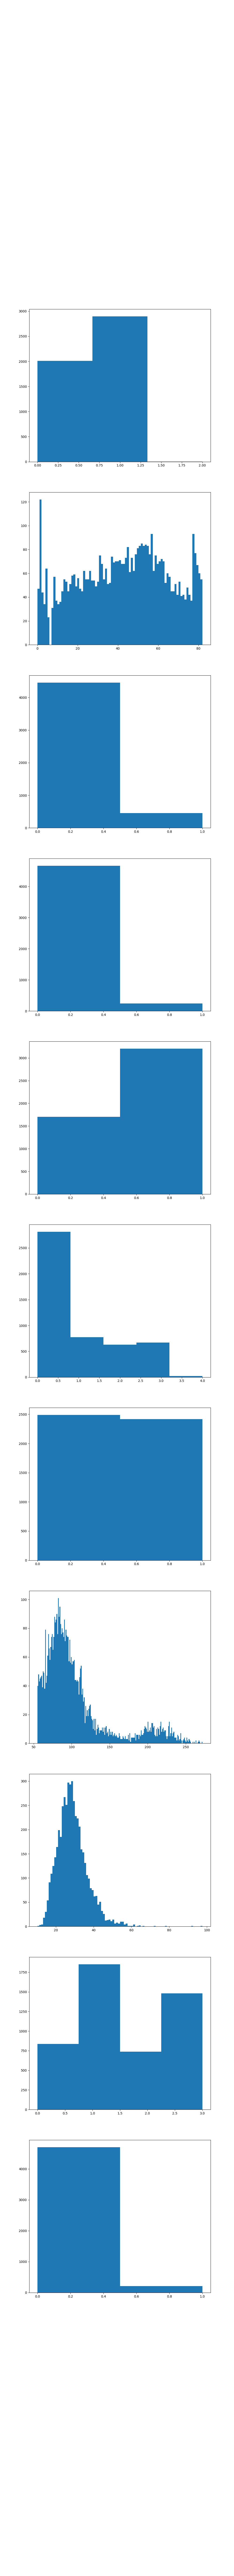

In [41]:
fig1, ax1 = plt.subplots(nrows=len(dataLabels), ncols=1, figsize=(10, 10*len(dataLabels)))

for i in range(0,len(dataLabels)):
    maxForCol = np.floor(np.max(dataFrameClean[dataLabels[i]]))
    minForCol = np.floor(np.min(dataFrameClean[dataLabels[i]]))

    ax1[i].hist(dataFrameClean[dataLabels[i]], bins=int(maxForCol-minForCol+1), align='mid')
    ax1[i].plot()

In [7]:
train_set = dataFrameClean.sample(frac=0.8)
test_set = dataFrameClean.drop(train_set.index) 

In [11]:
import seaborn as sns

# plot the heatmap
sns.heatmap(train_set)

TypeError: Image data of dtype object cannot be converted to float

In [8]:
from sklearn.linear_model import SGDClassifier

x = train_set.drop(columns='stroke')
y = train_set['stroke']

clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(x, y)


c:\Users\benal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [10]:
from sklearn.metrics import confusion_matrix

xTest = test_set.drop(columns='stroke')
yTest = test_set['stroke']

yPred = clf.predict(xTest)

confusion_matrix(yTest, yPred)

array([[886,  56],
       [ 32,   8]], dtype=int64)